In [195]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import numpy as np

In [196]:
original = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).raw)
tampered = Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png", stream=True).raw)
# tampered = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).raw)


In [197]:
print(original.format, original.size)
print(tampered.format, tampered.size)

JPEG (1200, 800)
PNG (282, 179)


In [198]:
original = original.resize((250,160))
original.save('pancard_tampering/image/original1.png')

tampered = tampered.resize((250,160))
tampered.save('pancard_tampering/image/tampered1.png')

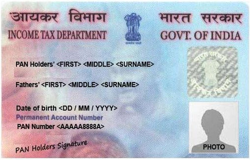

In [199]:
original

In [200]:
original_gray = cv2.cvtColor(cv2.imread('pancard_tampering/image/original1.png'), cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(cv2.imread('pancard_tampering/image/tampered1.png'), cv2.COLOR_BGR2GRAY)

In [201]:
tampered_gray

array([[254, 254, 254, ..., 252, 252, 254],
       [254, 254, 254, ..., 251, 251, 253],
       [254, 254, 250, ..., 238, 252, 252],
       ...,
       [253, 255, 250, ..., 236, 251, 252],
       [254, 253, 253, ..., 248, 253, 253],
       [255, 254, 254, ..., 253, 253, 250]], dtype=uint8)

In [202]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


In [203]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [204]:
original_gray.shape

(160, 250)

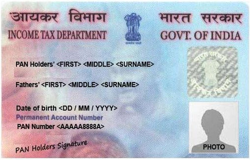

In [205]:
original

In [206]:
np.array(original)

array([[[253, 255, 254],
        [253, 255, 254],
        [252, 254, 253],
        ...,
        [254, 253, 253],
        [254, 253, 251],
        [255, 254, 250]],

       [[253, 255, 254],
        [250, 252, 251],
        [248, 250, 249],
        ...,
        [246, 249, 249],
        [248, 249, 248],
        [252, 252, 249]],

       [[252, 253, 253],
        [248, 250, 249],
        [251, 253, 252],
        ...,
        [243, 252, 252],
        [244, 249, 248],
        [251, 251, 251]],

       ...,

       [[248, 250, 246],
        [233, 228, 225],
        [227, 213, 211],
        ...,
        [177, 193, 207],
        [191, 202, 211],
        [232, 240, 244]],

       [[249, 252, 250],
        [249, 248, 246],
        [251, 244, 242],
        ...,
        [233, 240, 245],
        [236, 243, 245],
        [243, 249, 249]],

       [[250, 254, 253],
        [253, 255, 253],
        [255, 253, 250],
        ...,
        [255, 255, 255],
        [254, 255, 253],
        [252, 254, 251]]

In [207]:
original_arr = np.array(original)
tampered_arr = np.array(tampered)


In [208]:
original_arr = np.array(original)
tampered_arr = np.array(tampered)

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original_arr,(x,y), (x + w, y + h), (0,0,255), 1)
    cv2.rectangle(tampered_arr,(x,y), (x + w, y + h), (255,0,255), 1)

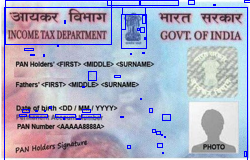

In [209]:
Image.fromarray(original_arr)

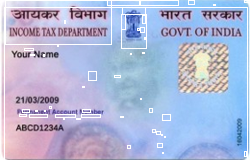

In [210]:
Image.fromarray(tampered_arr)

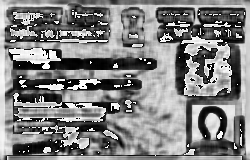

In [211]:
Image.fromarray(diff)

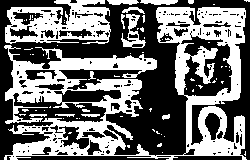

In [212]:
Image.fromarray(thresh)

In [213]:
print(f"PAN CARD MATCHING {round(score * 100,2)}%")

PAN CARD MATCHING 31.69%
